In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/whale/"
sz=224
arch=resnext50
bs=58

In [3]:
label_csv=f'{PATH}train.csv'

In [4]:
n=len(list(open(label_csv)))-1
n

9850

In [5]:
val_idx=get_cv_idxs(n)
val_idx

array([8920, 9839, 1851, ...,  111, 2884, 8774])

In [ ]:
len(val_idx)

In [6]:
label_df=pd.read_csv(label_csv)
label_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [ ]:
label_df.pivot_table(index='Id',aggfunc=len).sort_values('Image',ascending=False)

In [ ]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH,'new_train',f'{PATH}train.csv',test_name='test',
                                    val_idxs=val_idx,tfms=tfms, bs=bs, num_workers=4)

In [ ]:
fn=PATH+data.trn_ds.fnames[5000];fn

In [ ]:
img=PIL.Image.open(fn);img

In [ ]:
folder= os.listdir(PATH+'train/');
im1=PIL.Image.open(PATH+'train/'+ folder[0])
np.array(im1).shape[2]

In [ ]:
folder=os.listdir(PATH+'train/')


In [ ]:
channel=[]
for fn in folder:
    img=PIL.Image.open(PATH+'train/'+ fn)
    img_channel=np.array(img)
    channel.append(img_channel.shape)

In [ ]:
img_channel=list(zip(folder,channel))

In [ ]:
img_channel[5000]

In [ ]:
img2=np.array(PIL.Image.open(PATH+'new_train/de8c30fa.jpg'))
img2.shape

In [ ]:
len(img2.shape)

In [ ]:
img3=PIL.Image.open(PATH+'train/de8c30fa.jpg')
img3=img3.convert('RGB')
img3_conv=np.array(img3)
img3_conv.shape

In [ ]:
! mkdir {PATH}/new_train

In [ ]:
!ls {PATH}

In [ ]:
for fn in folder:
    img=PIL.Image.open(PATH+'train/'+ fn)
    img_channel=np.array(img)
    if len(img_channel.shape)<3:
        print(fn,img_channel.shape)
        img=img.convert('RGB')
        img.save(PATH+'new_train/'+fn)
    else :
        img.save(PATH+'new_train/'+fn)

In [ ]:
size_d={k:PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}

In [ ]:
row_sz,col_sz=list(zip(*size_d.values()))

In [ ]:
row_sz=np.array(row_sz);col_sz=np.array(col_sz)

In [ ]:
row_sz[:5]

In [7]:
def get_data(sz,bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH,'new_train',f'{PATH}train.csv',test_name='test',
                                    val_idxs=val_idx,tfms=tfms, bs=bs, num_workers=4)
    return data if sz>300 else data.resize(340,'tmp')

In [8]:
data=get_data(299,32)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [9]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 488/488 [05:19<00:00,  1.53it/s]


In [10]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 85%|████████▌ | 210/247 [00:03<00:00, 66.02it/s, loss=45.5]


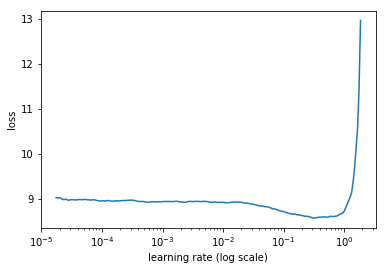

In [11]:
learn.sched.plot()

In [12]:
learn.fit(1e-1,1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

RuntimeError: cuda runtime error (59) : device-side assert triggered at /opt/conda/conda-bld/pytorch_1503965122592/work/torch/lib/THC/generic/THCTensorCopy.c:65

In [ ]:
??ConvLearner

In [ ]:
??ConvnetBuilder

In [ ]:
??ImageClassifierData

In [ ]:
len(data.classes)

In [ ]:
??csv_source